<a href="https://colab.research.google.com/github/everestso/47.53.59/blob/master/01_mascots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Do teams with cat mascots or teams with dog mascots cause more upsets?



## Step 1

### A "cat" is any member of the biological family [Felidae](https://en.wikipedia.org/wiki/Felidae). To find out how many upsets cat mascots have caused, you need to sum up upsets by mascot taxonomic Family.

In [ ]:
from pandas.io import gbq
project_id = 'c264s20'

import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

#ensure the file is accessible
!ls /content/gdrive/'My Drive'/'csuf'/'projects'/'GCP'

import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="/content/gdrive/My Drive/csuf/projects/GCP/c264s20-557a598add94.json"

#ensure the path is set correctly
!echo $GOOGLE_APPLICATION_CREDENTIALS

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
c264s20-557a598add94.json  GCP.BigData.ML.Wk1Links.gdoc
GCP.BigData.ML.gdoc	   GCP.CoreInfrastructure.gdoc
GCP.BigData.ML.Lab2.gdoc   GCP.ML.Special.gdoc
GCP.BigData.ML.Lab3.gdoc   GCP.Notes.gdoc
GCP.BigData.ML.Lab4.gdoc   public_datasets_one_pager.pdf
/content/gdrive/My Drive/csuf/projects/GCP/c264s20-557a598add94.json


In [ ]:
from google.cloud import bigquery
client = bigquery.Client()

In [ ]:
families_q = """
SELECT
  tax_family,
  COUNT(win_team_id) AS num_upsets
FROM
  `bigquery-public-data.ncaa_basketball.mbb_historical_tournament_games` games
JOIN
  `bigquery-public-data.ncaa_basketball.mascots` mascots
ON
  games.win_team_id=mascots.id
WHERE
  CAST(win_seed AS INT64) > CAST(lose_seed AS INT64)
GROUP BY
  tax_family
ORDER BY
  num_upsets
DESC
"""

families = gbq.read_gbq(query=families_q, dialect ='standard', project_id=project_id)
families.head(50)

,tax_family,num_upsets
0,Hominidae,123
1,Felidae,97
2,None,82
3,Canidae,77
4,Accipitridae,36
5,Bovidae,34
6,Ursidae,24
7,Cardinalidae,17
8,Rutaceae,11
9,Alligatoridae,8


In [ ]:
families = client.query(families_q).to_dataframe()
families.head(50)

,tax_family,num_upsets
0,Hominidae,123
1,Felidae,97
2,None,82
3,Canidae,77
4,Accipitridae,36
5,Bovidae,34
6,Ursidae,24
7,Cardinalidae,17
8,Rutaceae,11
9,Alligatoridae,8


## Step 2

### But, a "dog" isn't any creature in Canidae - it's [*Canis lupus familiaris*](https://en.wikipedia.org/wiki/Dog). To find upsets by dogs, we need to separate Canis lupus familiaris from other canines within the Canidae family.

In [ ]:
family_w_dogs_q = """
WITH tax_upsets AS(
SELECT
  tax_subspecies,
  tax_species,
  tax_family,
  COUNT(win_team_id) AS num_upsets
FROM
  `bigquery-public-data.ncaa_basketball.mbb_historical_tournament_games` games
JOIN
  `bigquery-public-data.ncaa_basketball.mascots` mascots
ON
  games.win_team_id=mascots.id
WHERE
  CAST(win_seed AS INT64) > CAST(lose_seed AS INT64)
GROUP BY
  tax_subspecies,
  tax_species,
  tax_family
)
SELECT
 IF(tax_family IS NOT NULL,IF(tax_family='Canidae',IF(tax_subspecies='familiaris',
  'Canidae Canis lupus familiaris','Canidae except Canis lupus familiaris'),tax_family),'No taxonomic family') AS tax_group,
 SUM(num_upsets) AS num_upsets_group
FROM tax_upsets
GROUP BY tax_group
ORDER BY num_upsets_group DESC
"""

family_w_dogs = gbq.read_gbq(query=family_w_dogs_q, dialect ='standard', project_id=project_id)
#family_w_dogs = client.query(family_w_dogs_q).to_dataframe()
family_w_dogs.head(50)

,tax_group,num_upsets_group
0,Hominidae,123
1,Felidae,97
2,No taxonomic family,82
3,Canidae Canis lupus familiaris,65
4,Accipitridae,36
5,Bovidae,34
6,Ursidae,24
7,Cardinalidae,17
8,Canidae except Canis lupus familiaris,12
9,Rutaceae,11


## Step 3

### Everything is better with a visualization...

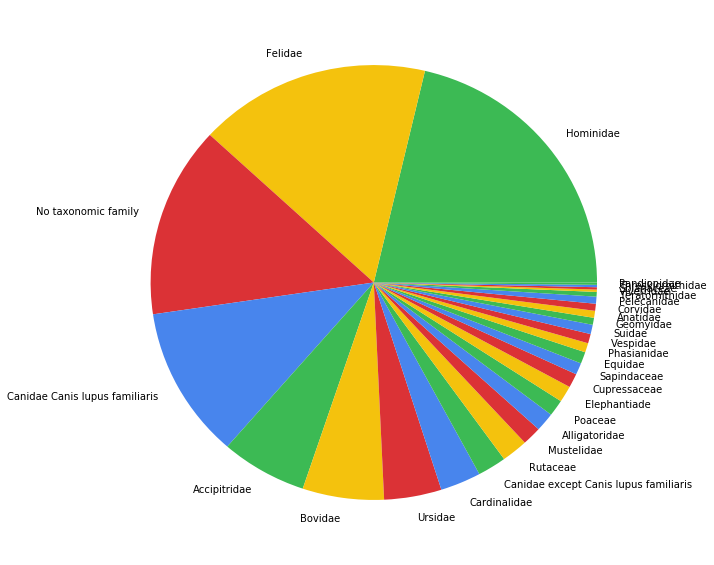

In [ ]:
colors = ["#3cba54","#f4c20d","#db3236","#4885ed"]
plt.figure(figsize=(10,10))
plt.pie(family_w_dogs.num_upsets_group, labels=family_w_dogs.tax_group, colors=colors);

## Step 4

### Not all teams have a mascot that can be categorized by biological family. ([Pepperdine is a good example](https://www.google.com/search?biw=1024&bih=1039&tbm=isch&sa=1&ei=7c-dWpbGI4vIjwS9tpnwCw&q=pepperdine+willie+the+wave+mascot&oq=pepperdine+willie+the+wave+mascot&gs_l=psy-ab.3...5808.7035.0.7501.11.11.0.0.0.0.143.1064.7j4.11.0....0...1c.1.64.psy-ab..4.3.256...0i13k1.0.qiJ13wkamxA).) But for D1 teams with mascots that *can* be categorized that way, how many mascots fit into each family?

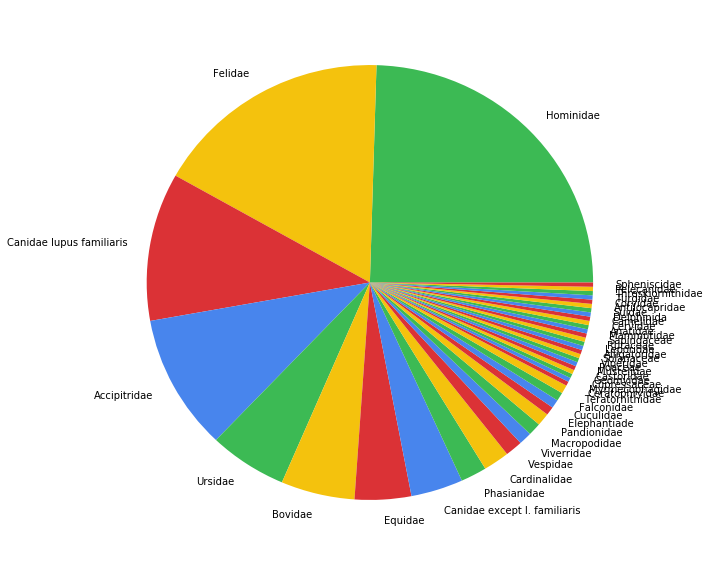

In [ ]:
mascots_q = """
SELECT 
 IF(tax_family='Canidae',IF(tax_subspecies='familiaris','Canidae lupus familiaris','Canidae except l. familiaris'),tax_family) AS tax_group,
 COUNT(id) AS num_mascots
FROM `bigquery-public-data.ncaa_basketball.mascots` 
WHERE tax_family IS NOT NULL
GROUP BY tax_group
ORDER BY num_mascots DESC
"""

mascots = gbq.read_gbq(query=mascots_q, dialect ='standard', project_id=project_id)
#mascots = client.query(mascots_q).to_dataframe()
plt.figure(figsize=(10,10))
plt.pie(mascots.num_mascots, labels=mascots.tax_group, colors=colors);

## Step 5

### Which teams have caused the most tournament upsets?

In [ ]:
upsets_q = """
SELECT
  mascots.market AS team,
  win_name,
  mascot_common_name,
  tax_subspecies,
  tax_species,
  tax_family,
  COUNT(win_team_id) AS num_upsets
FROM
  `bigquery-public-data.ncaa_basketball.mbb_historical_tournament_games` games
JOIN
  `bigquery-public-data.ncaa_basketball.mascots` mascots
ON
  games.win_team_id=mascots.id
WHERE
  CAST(win_seed AS INT64) > CAST(lose_seed AS INT64)
GROUP BY
  mascots.market,
  win_name,
  mascot_common_name,
  tax_subspecies,
  tax_species,
  tax_family
ORDER BY
  num_upsets
DESC
LIMIT 20
"""

upsets = gbq.read_gbq(query=upsets_q, dialect ='standard', project_id=project_id)
#upsets = client.query(upsets_q).to_dataframe()
upsets

,team,win_name,mascot_common_name,tax_subspecies,tax_species,tax_family,num_upsets
0,Michigan State,Spartans,Human,None,sapiens,Hominidae,15
1,Villanova,Wildcats,Wildcat,None,silvestris,Felidae,15
2,Xavier,Musketeers,Human,None,sapiens,Hominidae,12
3,Syracuse,Orange,Orange,None,None,Rutaceae,11
4,Temple,Owls,Owls,None,None,None,10
5,Michigan,Wolverines,None,None,None,None,10
6,Connecticut,Huskies,Domestic dog,familiaris,lupus,Canidae,10
7,Gonzaga,Bulldogs,Domestic dog,familiaris,lupus,Canidae,10
8,Arizona,Wildcats,Wildcat,None,silvestris,Felidae,10
9,Butler,Bulldogs,Domestic dog,familiaris,lupus,Canidae,10


## Not only do cat mascots cause more upsets than dog mascots, but one cat team is currently tied at the top for most tournament upsets overall. Meow!

# Another DB


In [ ]:
weather_q = """
with nyc_weather as (
SELECT
  -- Create a timestamp from the date components.
  timestamp(concat(year,"-",mo,"-",da)) as timestamp,
  -- Replace numerical null values with actual nulls
  AVG(IF (temp=9999.9, null, temp)) AS temperature,
  AVG(IF (visib=999.9, null, visib)) AS visibility,
  AVG(IF (wdsp="999.9", null, CAST(wdsp AS Float64))) AS wind_speed,
  AVG(IF (gust=999.9, null, gust)) AS wind_gust,
  AVG(IF (prcp=99.99, null, prcp)) AS precipitation,
  AVG(IF (sndp=999.9, null, sndp)) AS snow_depth
FROM
  `bigquery-public-data.noaa_gsod.gsod20*`
WHERE
  CAST(YEAR AS INT64) > 2008
  AND (stn="725030" OR  -- La Guardia
       stn="744860")    -- JFK
GROUP BY timestamp
)
SELECT
  descriptor,
  sum(complaint_count) as total_complaint_count,
  count(wind_speed) as data_count,
  ROUND(corr(wind_speed, avg_count),3) AS corr_count,
  ROUND(corr(wind_speed, avg_pct_count),3) AS corr_pct
From (
SELECT
  avg(pct_count) as avg_pct_count,
  avg(day_count) as avg_count,
  sum(day_count) as complaint_count,
  descriptor,
  wind_speed
FROM (
  SELECT
    DATE(timestamp) AS date,
    wind_speed
  FROM
    nyc_weather) a
  JOIN (
  SELECT x.date, descriptor, day_count, day_count / all_calls_count as pct_count
  FROM
    (SELECT
      DATE(created_date) AS date,
      concat(complaint_type, ": ", descriptor) as descriptor,
      COUNT(*) AS day_count
    FROM
      `bigquery-public-data.new_york.311_service_requests`
    GROUP BY
      date,
      descriptor)x
    JOIN (
      SELECT
        DATE(timestamp) AS date,
        COUNT(*) AS all_calls_count
      FROM nyc_weather
      GROUP BY date
    )y
  ON x.date=y.date
)b
ON
  a.date = b.date
GROUP BY
  descriptor,
  wind_speed
)
GROUP BY descriptor
HAVING
  total_complaint_count > 5000 AND
  ABS(corr_pct) > 0.5 AND
  data_count > 5
ORDER BY
  ABS(corr_pct) DESC
"""

In [ ]:
weather = gbq.read_gbq(query=weather_q, dialect ='standard', project_id=project_id)
weather

,descriptor,total_complaint_count,data_count,corr_count,corr_pct
0,Noise - Street/Sidewalk: Loud Talking,109951,452,-0.668,-0.668
1,Noise - Vehicle: Car/Truck Music,78780,449,-0.644,-0.644
2,HEAT/HOT WATER: ENTIRE BUILDING,554680,385,0.609,0.609
3,HEAT/HOT WATER: APARTMENT ONLY,294893,385,0.574,0.574
4,Noise - Street/Sidewalk: Loud Music/Party,192111,452,-0.552,-0.552
5,Maintenance or Facility: Structure - Outdoors,35731,445,-0.542,-0.542
6,HEATING: HEAT,871935,384,0.535,0.535
7,Sanitation Condition: 22 Weeds,14195,376,-0.516,-0.516
8,Maintenance or Facility: Garbage or Litter,15518,416,-0.501,-0.501


Query compares the number of complaints and wind speed with the CORR function.

Notice that the Corr columns are both negative for noise related complaints.
